# INTRODUÇÃO A TESTES ESTATÍSTICOS

## Libs

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import zconfint, DescrStatsW


In [43]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [44]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


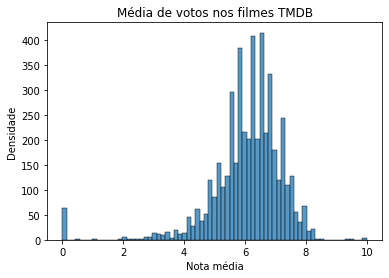

In [45]:
# Histograma nao normalizado

ax = sns.histplot(tmdb.vote_average, kde = False)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos nos filmes TMDB')

ax;

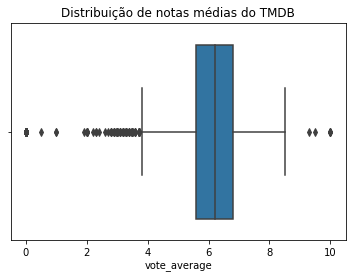

In [46]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set_title('Distribuição de notas médias do TMDB');

In [47]:
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [48]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count > 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.358000e+03,4358.000000,4358.000000,4.358000e+03,4357.000000,4358.000000,4358.000000
mean,3.186705e+07,49112.662001,23.619184,9.059446e+07,108.496443,6.232010,760.249656
std,4.171009e+07,80167.435191,32.661510,1.687623e+08,21.000772,0.888111,1275.510839
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,11.000000
25%,3.000000e+06,8358.250000,6.719426,4.814275e+04,95.000000,5.700000,87.000000
50%,1.800000e+07,12960.500000,14.955512,2.744996e+07,105.000000,6.300000,292.000000
75%,4.300000e+07,46528.750000,30.433317,1.031351e+08,119.000000,6.800000,835.750000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


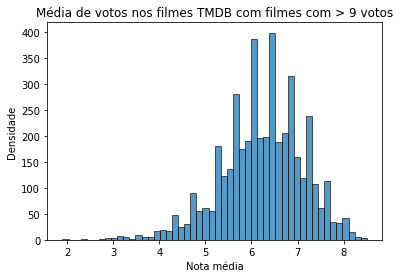

In [49]:
# Histograma nao normalizado

ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_average, kde = False)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos nos filmes TMDB com filmes com > 9 votos')

ax;

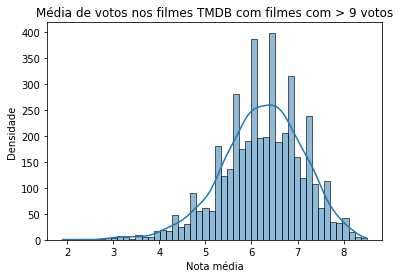

In [50]:
# Histograma nao normalizado

ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_average, kde = True)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos nos filmes TMDB com filmes com > 9 votos')

ax;

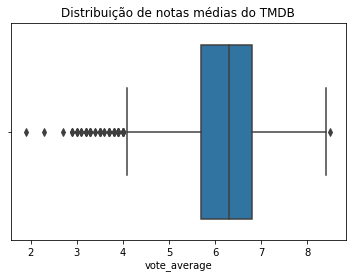

In [51]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set_title('Distribuição de notas médias do TMDB');

In [52]:
notas = pd.read_csv('ratings.csv')
notas.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [53]:
# calculando media agrupando pelo ID

nota_media_por_filme = notas.groupby('movieId').mean()['rating']

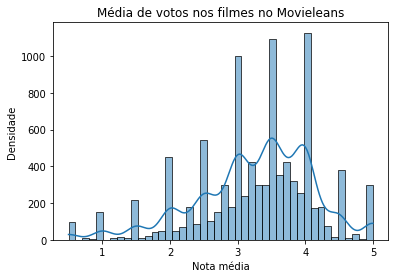

In [54]:
ax = sns.histplot(nota_media_por_filme.values, kde = True)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos nos filmes no Movieleans')

ax;

In [55]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index

filmes_com_pelo_menos_10_votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [56]:
nota_media_por_filme.loc[[1,3,5]]

movieId
1    3.920930
3    3.259615
5    3.071429
Name: rating, dtype: float64

In [57]:
nota_media_por_filme_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]

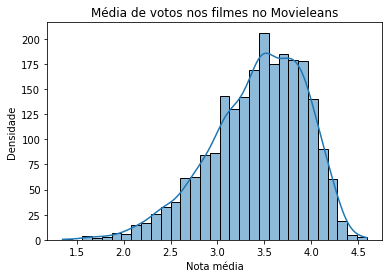

In [58]:
ax = sns.histplot(nota_media_por_filme_com_pelo_menos_10_votos.values, kde = True)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos nos filmes no Movieleans')

ax;

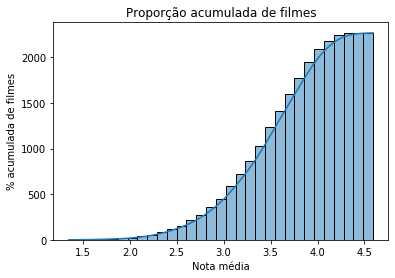

In [59]:
# cumulative

ax = sns.histplot(nota_media_por_filme_com_pelo_menos_10_votos.values,
                 kde = True,
                 cumulative = True)
ax.set(xlabel = 'Nota média', ylabel = '% acumulada de filmes')
ax.set_title('Proporção acumulada de filmes')

ax;

### Analisando a distribuição dos dados x outros campos - TMDB

In [60]:
tmdb_com_mais_de_10_votos.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4358, dtype: int64

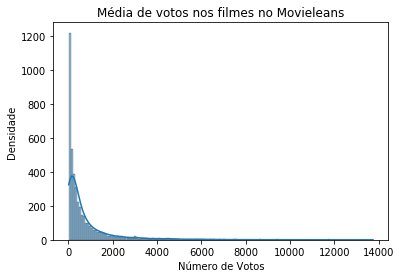

In [61]:
ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_count, kde = True)
ax.set(xlabel = 'Número de Votos', ylabel = 'Densidade')
ax.set_title('Média de votos nos filmes no Movieleans')

ax;

In [62]:
tmdb.query('budget > 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",http://tincanmanthemovie.com/,157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fle

In [63]:
tmdb.runtime.isnull().sum()

2

Text(0.5, 1.0, 'Tempo de duracao em filmes no TMDB 5000')

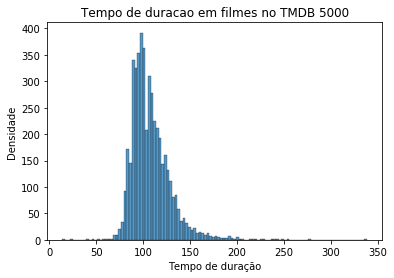

In [64]:
ax = sns.histplot(tmdb.query('runtime > 0').runtime.dropna())
ax.set(xlabel= 'Tempo de duração', ylabel = 'Densidade')
ax.set_title('Tempo de duracao em filmes no TMDB 5000')

Text(0.5, 1.0, 'Tempo de duracao em filmes no TMDB 5000')

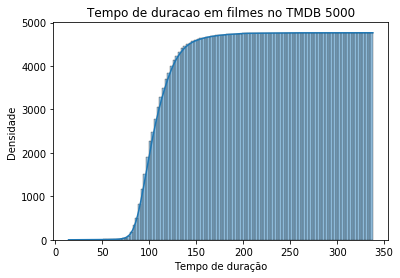

In [65]:
ax = sns.histplot(tmdb.query('runtime > 0').runtime.dropna(), cumulative = True, kde = True)
ax.set(xlabel= 'Tempo de duração', ylabel = 'Densidade')
ax.set_title('Tempo de duracao em filmes no TMDB 5000')

In [67]:
nota_media_por_filme_com_pelo_menos_10_votos.mean()

3.4320503405352603

In [71]:
medias = list()
for i in range(1, len(nota_media_por_filme_com_pelo_menos_10_votos)):
    medias.append(nota_media_por_filme_com_pelo_menos_10_votos[0:i].mean())
    
medias

[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653,
 3.469175997829668,
 3.420007998139716,
 3.4295335135237663,
 3.4564107421798558,
 3.352874931119765,
 3.396552967684635,
 3.363506887044249,
 3.406839377909513,
 3.4332165225577675,
 3.451002087720583,
 3.405769002692592,
 3.3524884731224396,
 3.3603714480862994,
 3.3531004361987162,
 3.3416954143887807,
 3.331376585132172,
 3.3447231039898004,
 3.3514742733815486,
 3.3879658756270143,
 3.412973556391407,
 3.404174978311576,
 3.425614825316986,
 3.4337122869128076,
 3.4475781010027933,
 3.4424344719950075,
 3.4507430374145236,
 3.4223910131474935,
 3.4190609824460543,
 3.4086964437466603,
 3.4248871013004156,
 3.4171696491401096,
 3.4393473639752203,
 3.4400036363518125,
 3.4550555181639973,
 3.4495614831510744,
 3.455822178683975,
 3.433832556918074,
 3.441766683501375,
 3.4432967795375005,
 3.4437021502486327,
 3.4427521035040973,
 3.4283255881604555,
 3.4216342812642555,
 3.43275

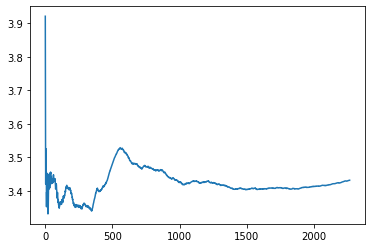

In [73]:
plt.plot(medias)

In [75]:
## list comp.

[nota_media_por_filme_com_pelo_menos_10_votos[0:i].mean() for i in range(1, len(nota_media_por_filme_com_pelo_menos_10_votos))]

[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653,
 3.469175997829668,
 3.420007998139716,
 3.4295335135237663,
 3.4564107421798558,
 3.352874931119765,
 3.396552967684635,
 3.363506887044249,
 3.406839377909513,
 3.4332165225577675,
 3.451002087720583,
 3.405769002692592,
 3.3524884731224396,
 3.3603714480862994,
 3.3531004361987162,
 3.3416954143887807,
 3.331376585132172,
 3.3447231039898004,
 3.3514742733815486,
 3.3879658756270143,
 3.412973556391407,
 3.404174978311576,
 3.425614825316986,
 3.4337122869128076,
 3.4475781010027933,
 3.4424344719950075,
 3.4507430374145236,
 3.4223910131474935,
 3.4190609824460543,
 3.4086964437466603,
 3.4248871013004156,
 3.4171696491401096,
 3.4393473639752203,
 3.4400036363518125,
 3.4550555181639973,
 3.4495614831510744,
 3.455822178683975,
 3.433832556918074,
 3.441766683501375,
 3.4432967795375005,
 3.4437021502486327,
 3.4427521035040973,
 3.4283255881604555,
 3.4216342812642555,
 3.43275

In [78]:
zconfint(nota_media_por_filme_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [81]:
desc_todos_com_10_votos = DescrStatsW(nota_media_por_filme_com_pelo_menos_10_votos)
desc_todos_com_10_votos.tconfint_mean()

(3.411234839229379, 3.4528658418411378)